In [1]:
pip install colour-science

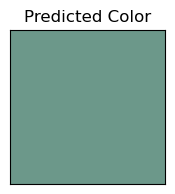

XYZ: [ 21.87199248  27.31879856  28.09005987]
sRGB: [ 0.42196005  0.594518    0.54040577]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colour  # pip install colour-science
from colour.colorimetry import SpectralShape
import tkinter as tk
from tkinter import filedialog

# Open a GUI for file selection
root = tk.Tk()
root.withdraw()  # Hide the main window
file_path = filedialog.askopenfilename(
    title="Select Reflectance .txt File",
    filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")]
)
if not file_path:
    raise ValueError("No file selected.")

# Load reflectance spectrum from selected file
# Format: two columns — wavelength (nm) and reflectance (0-1)
wavelengths, reflectance = np.loadtxt(file_path, delimiter=",", unpack=True)
wavelengths = np.array(wavelengths)
reflectance = np.array(reflectance)

# Define spectral shape: 360–830 nm with 1 nm interval
spectral_shape = SpectralShape(360, 830, 1)
interpolated_reflectance = colour.SpectralDistribution(dict(zip(wavelengths, reflectance)), name="Sample")
interpolated_reflectance = interpolated_reflectance.copy().align(spectral_shape)

# Standard illuminant D65
illuminant = colour.SDS_ILLUMINANTS['D65'].copy().align(spectral_shape)

# 2-degree standard observer
cmfs = colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer'].copy().align(spectral_shape)

# Calculate XYZ tristimulus values
xyz = colour.sd_to_XYZ(interpolated_reflectance, cmfs, illuminant)

# Convert to sRGB and clip to displayable range
rgb = colour.XYZ_to_sRGB(xyz / 100)
rgb_clipped = np.clip(rgb, 0, 1)

# Display the resulting color
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(rgb_clipped)
ax.set_xticks([]); ax.set_yticks([])
plt.title("Predicted Color")
plt.show()

# Print XYZ and RGB values
print("XYZ:", xyz)
print("sRGB:", rgb_clipped)

Text(0.5, 1.0, 'Trilayer')

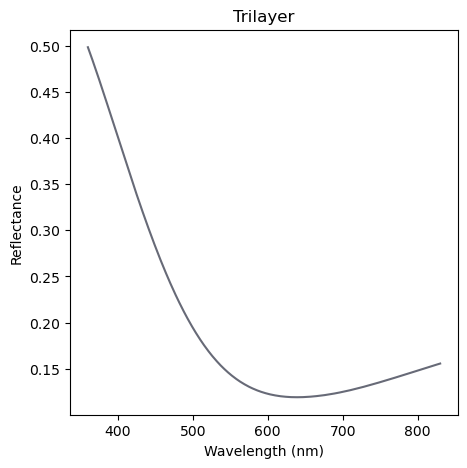

In [2]:
plt.figure(figsize=(5, 5))
#plt.plot(wavelengths1, reflectance1, label="Simulated")
plt.plot(wavelengths, reflectance, color=[ 0.4044207,   0.41697686,  0.46715581])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Fraction")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Trilayer")

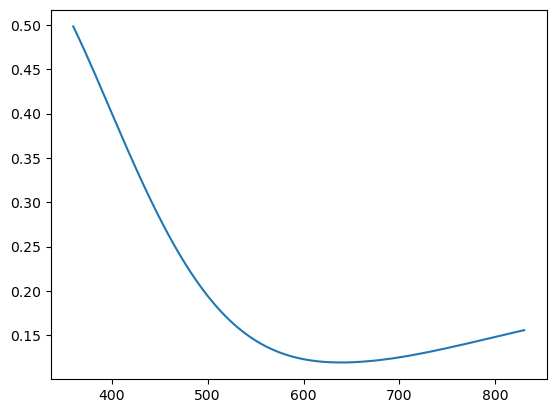

In [3]:
plt.plot(wavelengths, reflectance)